In [37]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

# Parameters

In [38]:
X = np.array(
    [[1129, 1.435],
     [1453, 1.601],
     [1656, 1.654],
     [1787, 1.803],
     [1611, 1.734]]
)
y = [0, 0, 0, 1,1]

X_test = np.array(
    [[1629, 1.635],
     [1853, 1.701],
     [1356, 1.454]]
)

n_iter = 3
lr = 0.01
threshold = 0.4

# Standardize the continuous initial variables

In [39]:
X_to_print = pd.DataFrame(X, columns = ['x_1','x_2'])
print(f'The original data (i.e., matrix X):')
X_to_print

The original data (i.e., matrix X):


,x_1,x_2
0,1129.0,1.435
1,1453.0,1.601
2,1656.0,1.654
3,1787.0,1.803
4,1611.0,1.734


In [40]:
X_train_mean = np.mean(X, axis=0)
print(f'X_train_mean: \n{X_train_mean} \n')
X_train_std = np.std(X, axis=0, ddof=1)
print(f'X_train_std: \n{X_train_std} \n')

X_train_mean: 
[1527.2       1.6454] 

X_train_std: 
[2.52575137e+02 1.40535761e-01] 



In [41]:
X_std = (X - np.mean(X, axis=0)) / np.std(X, axis=0, ddof=1)
X_std_to_print = pd.DataFrame(X_std, columns = ['x_1_std','x_2_std'])
print(f'The standardised data (i.e., matrix X_std):')
print(f'x_1_std mean = {X_std_to_print["x_1_std"].mean():.2f}')
print(f'x_1_std std = {X_std_to_print["x_1_std"].std():.2f}')
print(f'x_2_std mean = {X_std_to_print["x_2_std"].mean():.2f}')
print(f'x_2_std std = {X_std_to_print["x_2_std"].std():.2f}')
X_std_to_print

The standardised data (i.e., matrix X_std):
x_1_std mean = -0.00
x_1_std std = 1.00
x_2_std mean = -0.00
x_2_std std = 1.00


,x_1_std,x_2_std
0,-1.576561,-1.497128
1,-0.293774,-0.315934
2,0.509947,0.061194
3,1.028605,1.121423
4,0.331782,0.630445


# Compute coefficients

In [42]:
# 1. Initialize coefficients
weights = None
Xp = np.concatenate([np.ones((X_std.shape[0], 1)), X_std], axis=1)

m = Xp.shape[0]  # sample size
weights = np.zeros(Xp.shape[1])
y = np.asarray(y)
# b = 0

hist = np.zeros(n_iter)
# 2. Perform gradient descent
for i in range(n_iter):
    # linear_pred = np.dot(X_std, weights) + b
    print(f'Iteration #{i}:')
    linear_pred = np.dot(Xp, weights)
    print(f'Current linear prediction {linear_pred}')
    probability = 1 / (1 + np.exp(-linear_pred))
    print(f'Current probability prediction {probability}')
    
    loss = (y*np.log(probability)+(1-y)*np.log(probability)).mean()
    print(f'Current loss: {loss}')
    hist[i] = loss

    # Calculate derivatives
    print(f'Current residuals {probability - y}')
    partial_w = (1 / Xp.shape[0]) * (np.dot(Xp.T, (probability - y)))
    print(f'Current derivatives {partial_w}')
    # partial_d = (1 / X_std.shape[0]) * (np.sum(probability - y))
    
    # Update the coefficients
    weights -= lr * partial_w
    print(f'Current weights {weights}')
    # b -= lr * partial_d
    print(f'-'*10)

# weights, b
weights

Iteration #0:
Current linear prediction [0. 0. 0. 0. 0.]
Current probability prediction [0.5 0.5 0.5 0.5 0.5]
Current loss: -0.6931471805599453
Current residuals [ 0.5  0.5  0.5 -0.5 -0.5]
Current derivatives [ 0.1        -0.27207745 -0.35037346]
Current weights [-0.001       0.00272077  0.00350373]
----------
Iteration #1:
Current linear prediction [-0.010535   -0.00290624  0.00060186  0.00572777  0.00211162]
Current probability prediction [0.49736627 0.49927344 0.50015047 0.50143194 0.5005279 ]
Current loss: -0.6936511070721968
Current residuals [ 0.49736627  0.49927344  0.50015047 -0.49856806 -0.4994721 ]
Current derivatives [ 0.09975    -0.27085936 -0.34914938]
Current weights [-0.0019975   0.00542937  0.00699523]
----------
Iteration #2:
Current linear prediction [-0.02102998 -0.00580254  0.00119926  0.01143178  0.00421397]
Current probability prediction [0.4947427  0.49854937 0.50029981 0.50285791 0.50105349]
Current loss: -0.6941615756294335
Current residuals [ 0.4947427   0.498

array([-0.00299251,  0.00812583,  0.01047453])

# Visualization (the learning phase)

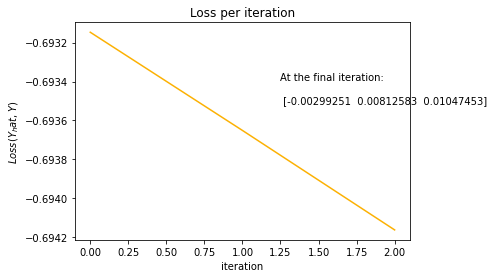

In [43]:
plt.plot(hist, 'b', color='#fcb103')
plt.title(u'Loss per iteration')
plt.xlabel(u'iteration')
plt.ylabel(r'$Loss(Y_hat, Y)$')
plt.figtext(x=.6, y=.6, s=f"At the final iteration:\n\n {weights}")
plt.show()

# Predict (test set)

In [44]:
X_test_std = (X_test - X_train_mean) / X_train_std
print(f'STD X_test: \n{X_test_std} \n')

STD X_test: 
[[ 0.40304838 -0.07400252]
 [ 1.28991319  0.39562884]
 [-0.6778181  -1.36193094]] 



In [45]:
Xp_test = np.concatenate([np.ones((X_test_std.shape[0], 1)), X_test_std], axis=1)
linear_pred = np.dot(Xp_test, weights)
y_pred = 1 / (1 + np.exp(-linear_pred))
y_pred

array([0.49987686, 0.50290825, 0.49430876])

In [46]:
[1 if i > threshold else 0 for i in y_pred]

[1, 1, 1]

# Test 1

In [47]:
class LogisticRegression:
    '''
    A class which implements logistic regression model with gradient descent.
    '''
    def __init__(self, learning_rate=0.1, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights, self.bias = None, None
        
    @staticmethod
    def _sigmoid(x):
        '''
        Private method, used to pass results of the line equation through the sigmoid function.
        
        :param x: float, prediction made by the line equation
        :return: float
        '''
        return 1 / (1 + np.exp(-x))
    
    @staticmethod
    def _binary_cross_entropy(y, y_hat):
        '''
        Private method, used to calculate binary cross entropy value between actual classes 
        and predicted probabilities.
        
        :param y: array, true class labels
        :param y_hat: array, predicted probabilities
        :return: float
        '''
        def safe_log(x): 
            return 0 if x == 0 else np.log(x)
        total = 0
        for curr_y, curr_y_hat in zip(y, y_hat):
            total += (curr_y * safe_log(curr_y_hat) + (1 - curr_y) * safe_log(1 - curr_y_hat))
        return - total / len(y)
        
    def fit(self, X, y):
        '''
        Used to calculate the coefficient of the logistic regression model.
        
        :param X: array, features
        :param y: array, true values
        :return: None
        '''
        # 1. Initialize coefficients
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        
        # 2. Perform gradient descent
        for i in range(self.n_iterations):
            linear_pred = np.dot(X, self.weights) + self.bias
            probability = self._sigmoid(linear_pred)
            
            # Calculate derivatives
            partial_w = (1 / X.shape[0]) * (np.dot(X.T, (probability - y)))
            partial_d = (1 / X.shape[0]) * (np.sum(probability - y))
            
            # Update the coefficients
            self.weights -= self.learning_rate * partial_w
            self.bias -= self.learning_rate * partial_d
            
    def predict_proba(self, X):
        '''
        Calculates prediction probabilities for a given threshold using the line equation 
        passed through the sigmoid function.
        
        :param X: array, features
        :return: array, prediction probabilities
        '''
        linear_pred = np.dot(X, self.weights) + self.bias
        return self._sigmoid(linear_pred)
    
    def predict(self, X, threshold=0.5):
        '''
        Makes predictions using the line equation passed through the sigmoid function.
        
        :param X: array, features
        :param threshold: float, classification threshold
        :return: array, predictions
        '''
        probabilities = self.predict_proba(X)
        return [1 if i > threshold else 0 for i in probabilities]

In [48]:
model = LogisticRegression(learning_rate=lr, n_iterations=n_iter)
model.fit(X_std, np.asarray(y))
print(f'Weights: {model.bias}, {model.weights}')
preds = model.predict_proba(X_test_std)
print(f'Prediction prob: {preds}')

Weights: -0.0029925066216211892, [0.00812583 0.01047453]
Prediction prob: [0.49987686 0.50290825 0.49430876]
